(540, 2500) (540,)


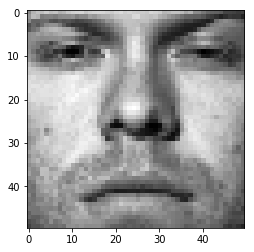

(100, 2500) (100,)


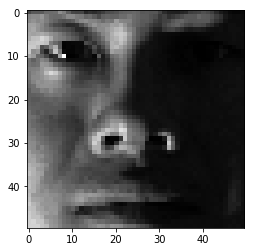

In [1]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import imageio
%matplotlib inline
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = imageio.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

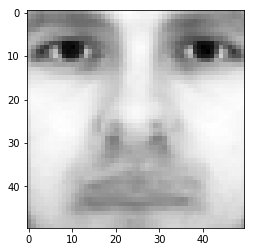

In [2]:
# exercise (1 c), average face
avg = np.asfarray([0 for i in range(2500)])

for image in train_data:
    avg += image
avg = avg/540
plt.imshow(avg.reshape((50,50)), cmap = cm.Greys_r)
plt.show()

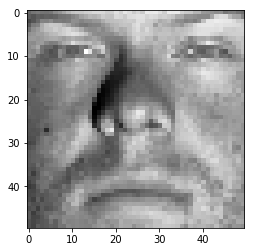

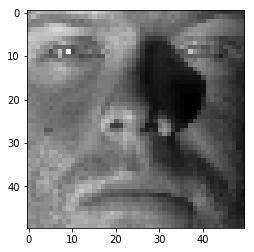

In [4]:
# exercise 1 d, subtract training mean from train and test datasets
train_data_normalized = train_data - avg
test_data_normalized = test_data - avg

plt.imshow(train_data_normalized[1,:].reshape((50,50)), cmap = cm.Greys_r)
plt.show()

plt.imshow(test_data_normalized[1,:].reshape((50,50)), cmap = cm.Greys_r)
plt.show()

540 540
540 540
2500 2500


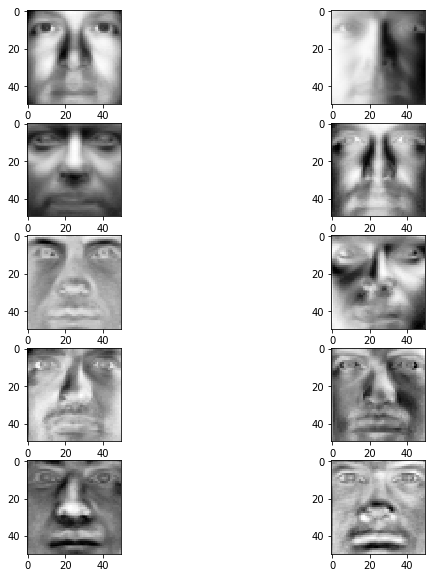

In [5]:
# exercise 1 e, calculate svd of train_data and plot first 10 faces from Vh
from scipy import linalg

U, s, Vh = linalg.svd(train_data_normalized)

S = linalg.diagsvd(s, 540, 540)

print(len(U),len(U[0]))
print(len(S),len(S[0]))
print(len(Vh),len(Vh[0]))

plt.figure(figsize = (10,10))

for i in range(10):
    plt.subplot(5,2,i+1)
    img = Vh[i].reshape((50,50))
    plt.imshow(img, cmap = cm.Greys_r)
plt.show()

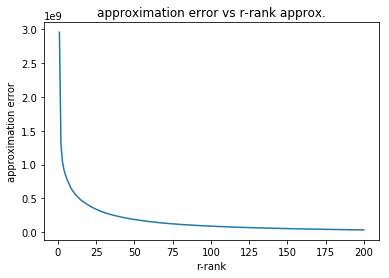

In [6]:
# exercise 1 f, plot approximation error as a function of r (approx. rank)

errors = []
for r in range(1,201):
    train_data_hat = np.dot( np.dot(U[:,:r],S[:r,:r]), Vh[:r,:])
    error = np.sum((train_data_normalized - train_data_hat)**2)
    errors.append(error)
plt.plot([i+1 for i in range(200)], errors)
plt.xlabel("r-rank")
plt.ylabel("approximation error")
plt.title("approximation error vs r-rank approx.")
plt.show()

In [7]:
# exercise 1 g, write function to calculate(represent) 
# train/test images in r-dimensional face space 
def generate_F(r, data):
    return np.dot(data, np.transpose(Vh[:r,:]))

F = generate_F(10, train_data_normalized)
F_test = generate_F(10, test_data_normalized)

print(len(F), len(F[0]))
print(len(F_test), len(F_test[0]))

540 10
100 10


In [9]:
# exercise 1 h, train logistic regression model on F matrix
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(F, train_labels)
model.score(F_test, test_labels)

0.79

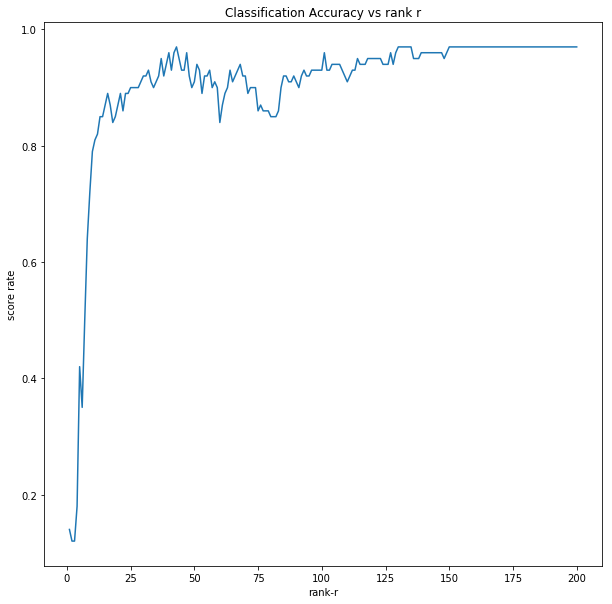

In [10]:
# exercise 1 h, plot classification accuracy as function of rank r from [1,200]
performances = []
ranks = [i for i in range(1,201)]

for rank in ranks:
    model = linear_model.LogisticRegression()
    model.fit(generate_F(rank,train_data_normalized), train_labels)
    performance = model.score(generate_F(rank, test_data_normalized), test_labels)
    performances.append(performance)

plt.figure(figsize=(10,10))
plt.plot(ranks, performances)
plt.xlabel("rank-r")
plt.ylabel("score rate")
plt.title("Classification Accuracy vs rank r")
plt.show()